In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [3]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [4]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

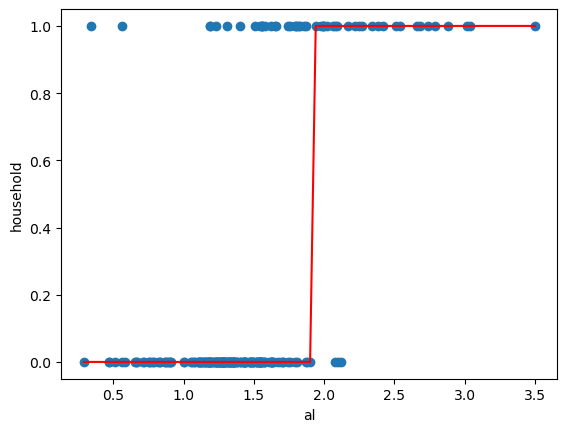

In [6]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [7]:
#####LOGISTIC REGRESSION#########

# 1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall
logreg.predict_proba(X)[:15]


array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [8]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

Text(0, 0.5, 'household')

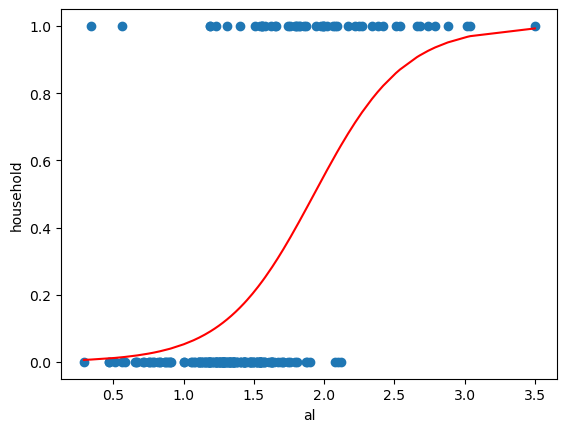

In [9]:
# Plot the predicted probabilities.
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [10]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [11]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

In [12]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [13]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [14]:
# 2. Do the same analysis for other columns

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)

0.8691588785046729

In [15]:
precision_score(y_true=y, y_pred=pred)

0.896551724137931

In [16]:
recall_score(y,pred)

0.5098039215686274

In [17]:
######CLUSTERING#########
#1. Repeat the above exercise for different values of k
# - How do the inertia and silhouette scores change?
# - What if you don't scale your features?
# - Is there a 'right' k? Why or why not?

%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [18]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


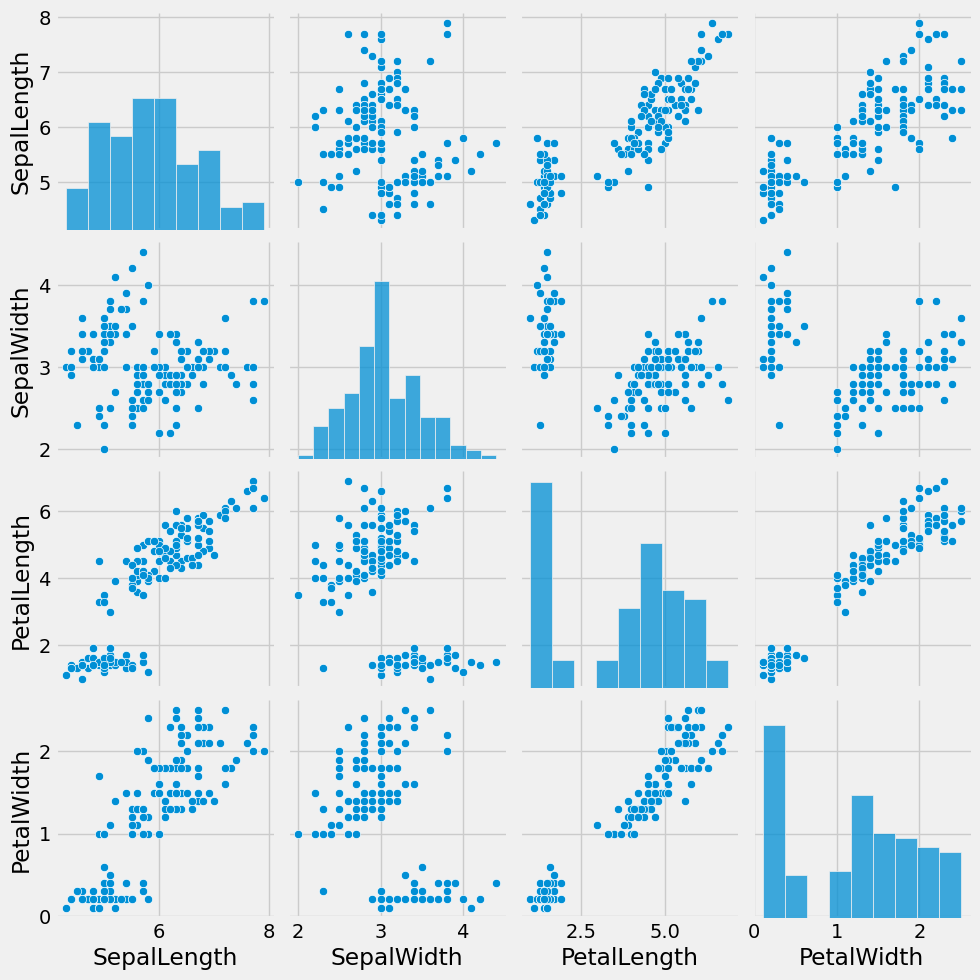

In [19]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [20]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [21]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [22]:
# try using k=3
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)


/Users/yushanli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [23]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [24]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.5043188549150883

In [25]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


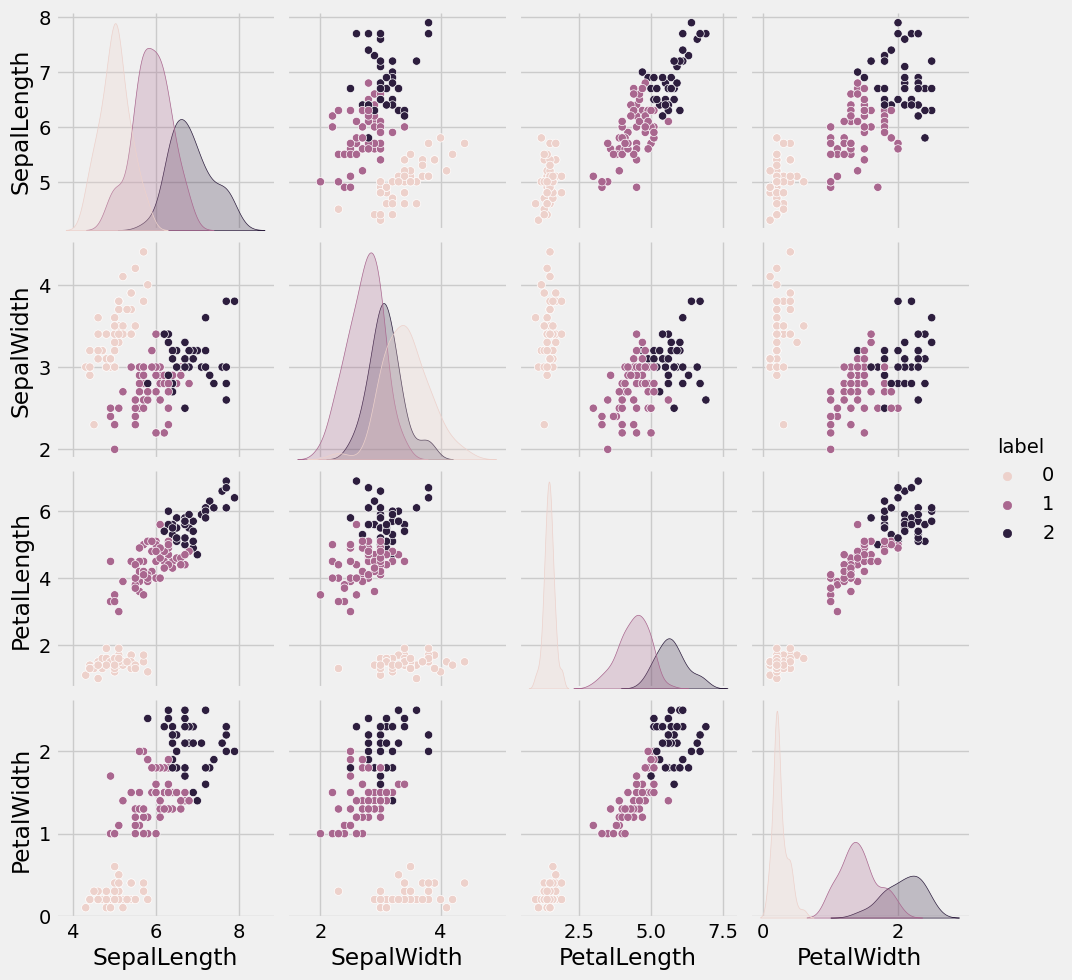

In [26]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

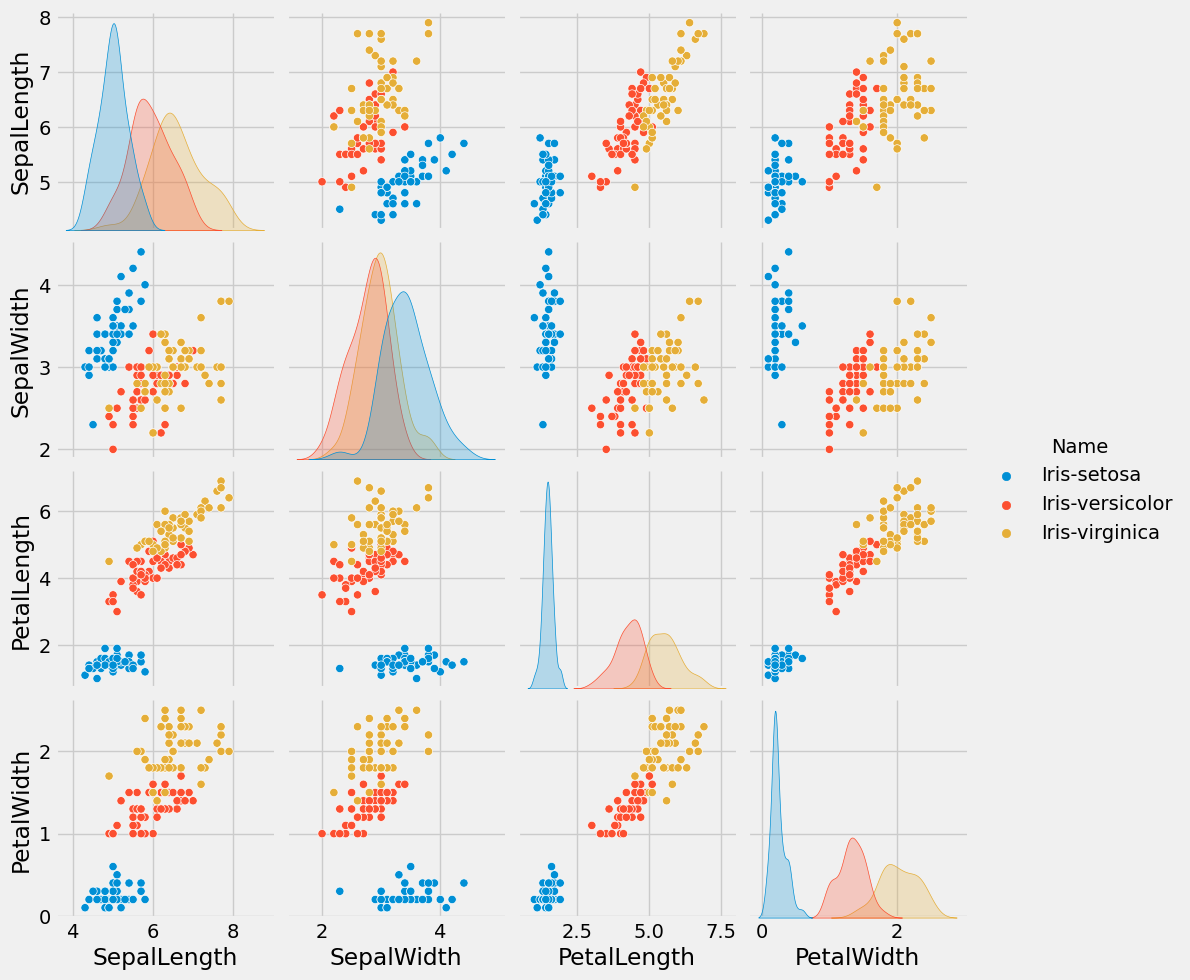

In [27]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')